<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-предобработке-данных:" data-toc-modified-id="Выводы-по-предобработке-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по предобработке данных:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Атрибут-class_weight" data-toc-modified-id="Атрибут-class_weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Атрибут class_weight</a></span></li><li><span><a href="#Увеличение-и-уменьшение-выборки" data-toc-modified-id="Увеличение-и-уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение и уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Спрогнозируем, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Проверим *F1*-меру на тестовой выборке самостоятельно.

Дополнительно будем измерять *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
!pip install imblearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Рассмотрим, какие столбцы включает в себя таблица:

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

Exited — факт ухода клиента

Выведем информацию о таблице с помощью методов describe() и info():

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Таблица включает в себя информацию о 10000 пользователях от 18 до 92 лет. 

В столбце Tenure много пропусков.

In [6]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

В столбце Tenure скрыты под nan могут быть любые значения (можно было бы предположить, что это только нули, но нули уже встречаются в данном столбце). Заменим пропуски *медианным* значением.

In [7]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype(int)

In [8]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

Пропусков в столбце больше нет.

Некоторые сомнения вызывает столбец, содержащий информацию о предполагаемой зарплате. Минимальное значение составляет 11.58 при среднем примерно равном 100000. Не понятно, в какой валюте и за какой период времени представлена предполагаемая зарплата. А, не зная этого, не стоит удалять/изменять данные.

Проверим, не встречаются ли в датасете дубликаты.

In [9]:
data.duplicated().sum()

0

Явных дубликатов нет. Теперь проверим, встречается ли в таблице несколько раз один и тот же идентификационный номер:

In [10]:
data['CustomerId'].duplicated().sum()

0

Для того, чтобы перейти к обучению модели, необходимо установить:

*объекты* - строки с информацией пользователях банка;

*признаки* - столбцы с информацией о кредитном рейтинге, стране проживания, поле, возрасте, количестве лет в качестве клиента банка, балансе на счете, кол-ве используемых продуктов банка, наличии кредитной карты, активности клиента, предполагаемой зарплате;

*целевой признак* - факт ухода клиента.

Ненужными для обучения модели столбцами являются столбцы с фамилией, с индексом строки в данных, с идентификационным номером.

Для подготовки данных к обучению удалим ненужные столбцы из таблицы.

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
data.select_dtypes(include='object').nunique()

Geography    3
Gender       2
dtype: int64

В таблице представлена информация о пользователях двух полов из трех стран.

Столбцы со страной проживания и полом категориальные, для успешного обучения модели преобразуем их в численные с помощью техники OHE. 

In [13]:
data = pd.get_dummies(data, drop_first=True)

In [14]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Выводы по предобработке данных:

- Были рассмотрены столбцы таблицы data;

- В столбце tenure пропуски были заполнены средним значением данного столбца.

- Была выполнена проверка на явные дубликаты и проверено отсутствие дубликатов в столбце с индивидуальным номером.

- Были обозначены объекты, признаки и целевой признак;

- Категориальные признаки Geography и Gender были преобразованы в численные С помощью техники OHE ;


## Исследование задачи

Посмотрим, каков баланс целевого признака в данной таблице.

In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Данные не сбалансированы. Наблюдается соотношение не ушедших клиентов банка к ушедшим примерно 4 к 1. Изучим модели без учета этого дисбаланса.

Разделим датасет на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%). target - столбец Exited, features - все столбцы за исключением Exited.

In [16]:
target = data['Exited']
features = data.drop('Exited', axis=1)

features_train, features_test_valid, target_train, target_test_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test_valid, target_test_valid, test_size=0.5, random_state=12345)

Теперь, когда данные поделены на выборки, можно приступить к масштабированию признаков.

In [17]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

pd.options.mode.chained_assignment = None

Приступим к обучению моделей. Будем менять гиперпараметры сравнивать модели между собой по значению f1-меры и auc-roc метрике.

*Решающее дерево*

In [18]:
best_depth = 0

best_f1 = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Наибольшее значение f1', best_f1, 'при глубине дерева, равной', best_depth)


Наибольшее значение f1 0.5329249617151608 при глубине дерева, равной 6


Значение auc_roc у модели равно:

In [19]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6675653716021234


*Случайный лес*

In [20]:
best_depth = 0

best_est = 0

best_f1 = 0

for est in tqdm(range(10, 101, 10)):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_est = est
            best_depth = depth

print("Наибольшее значение f1", best_f1, "при количестве деревьев", best_est, "и максимальной глубине", best_depth)

100%|██████████| 10/10 [01:04<00:00,  6.49s/it]

Наибольшее значение f1 0.552437223042836 при количестве деревьев 30 и максимальной глубине 16


Значение auc-roc у модели равно:

In [21]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8505061680091025


*Логистическая регрессия*

Вывод

Без учета дисбаланса классов у рассмотренных моделей самое большое значение f1 наблюдается у случайного леса - 0.5524 при количестве деревьев 30 и максимальной глубине 16 (0.8505). Далее следует решающее дерево с f1 равным 0.530 (0.659). Дополнительно изменялось значение auc-roc. Полученные значения указаны в скобках после соответствующих моделей.

## Борьба с дисбалансом

### Атрибут class_weight

Для того, чтобы справиться с дисбалансом классов, используем атрибут class_weight. Используем те же три модели, что и выше, но укажем class_weight='balanced'.

*Решающее дерево*

In [24]:
best_depth = 0

best_f1 = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Наибольшее значение f1', best_f1, 'при глубине дерева, равной', best_depth)


Наибольшее значение f1 0.5809128630705395 при глубине дерева, равной 5


Значение auc_roc у модели равно:

In [25]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.676302072792851


*Случайный лес*

In [26]:
best_depth = 0

best_est = 0

best_f1 = 0

for est in tqdm(range(10, 101, 10)):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=1, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_est = est
            best_depth = depth

print("Наибольшее значение f1", best_f1, "при количестве деревьев", best_est, "и максимальной глубине", best_depth)

100%|██████████| 10/10 [01:09<00:00,  6.99s/it]

Наибольшее значение f1 0.6220095693779906 при количестве деревьев 100 и максимальной глубине 10


Значение auc_roc у модели равно:

In [27]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8534751173413325


Промежуточные выводы:

- Решающее дерево. f1 = 0.5809, auc_roc = 0.6683

- Случайный лес. f1 = 0.6220, auc_roc = 0.8535

Метрика f1 случайного леса при кол-ве деревьев 100 и максимальной глубине 10 все еще самая высокая среди всех рассмотренных моделей, и она уже даже превысила метрику, указанную в условии успешной сдачи проекта (0.59).

### Увеличение и уменьшение выборки

In [30]:
features_zeros = features[target == 0]
features_ones = features[target == 1]
target_zeros = target[target == 0]
target_ones = target[target == 1]

print(f'Количество target_ones: {target_ones.count():.0f}\nКоличество target_zeros: {target_zeros.count():.0f}')
print(f'Количество features_ones: {features_ones["Age"].count():.0f}\nКоличество features_zeros: {features_zeros["Age"].count():.0f}')

Количество target_ones: 2037
Количество target_zeros: 7963
Количество features_ones: 2037
Количество features_zeros: 7963


Наибольшим классом является target_zeros, features_zeros - не ушедшие клиенты; наименьшим классом является target_ones, features_ones - ушедшие клиенты.

#### Увеличение выборки

Увеличим в несколько раз меньший класс и перемешаем объекты.

In [32]:
oversample = SMOTE(random_state=12345)
features_upsampled, target_upsampled = oversample.fit_resample(features_train, target_train)

*Решающее дерево*

In [33]:
best_depth = 0

best_f1 = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Наибольшее значение f1', best_f1, 'при глубине дерева, равной', best_depth)


Наибольшее значение f1 0.5703422053231939 при глубине дерева, равной 5


Значение auc_roc у модели равно:

In [34]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6782269053818859


*Случайный лес*

In [35]:
best_depth = 0
best_est = 0
best_f1 = 0
for est in tqdm(range(10, 101, 10)):
    for depth in range(1, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
print("Наибольшее значение f1", best_f1, "при количестве деревьев", best_est, "и максимальной глубине", best_depth)

100%|██████████| 10/10 [00:35<00:00,  3.58s/it]

Наибольшее значение f1 0.5974576271186441 при количестве деревьев 80 и максимальной глубине 9


Значение auc_roc у модели равно:

In [36]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8437872430370981


Значение auc_roc у модели равно:

In [38]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7317002238142566


#### Уменьшение выборки

Случайным образом отбросим часть 0-объектов и перемешаем все объекты.

In [39]:
fraction = 0.25

features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
   
target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

*Решающее дерево*

In [40]:
best_depth = 0

best_f1 = 0

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced')
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth
print('Наибольшее значение f1', best_f1, 'при глубине дерева, равной', best_depth)

Наибольшее значение f1 0.39215686274509803 при глубине дерева, равной 4


Значение auc_roc у модели равно:

In [41]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.5525536262256941


*Случайный лес*

In [42]:
best_depth = 0
best_est = 0
best_f1 = 0
for est in range(1, 11, 1):
    for depth in range(1, 10):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
print("Наибольшее значение f1", best_f1, "при количестве деревьев", best_est, "и максимальной глубине", best_depth)

Наибольшее значение f1 0.4071005917159764 при количестве деревьев 6 и максимальной глубине 3


Значение auc_roc у модели равно:

In [43]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.5766020408622171


Промежуточные выводы:

Метод upsampling:

- Решающее дерево. f1 = 0.5703, auc_roc = 0.6809

- Случайный лес. f1 = 0.5974, auc_roc = 0.8438

Метод downsampling:

- Решающее дерево. f1 = 0.3921, auc_roc = 0.5525

- Случайный лес. f1 = 0.4189, auc_roc = 0.5119

Балансировка данными методами не дает улучшения f1 метрики. Наилучшее значение наблюдается при применении upsampling у модели случайного леса при количестве деревьев 80 и максимальной глубине 9. В данном случае f1=0.5974.

## Тестирование модели

Для проверки на тестовых данных выберем модель случайный лес при количестве деревьев 100 и максимальной глубине 10.

In [46]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced')

model.fit(features_train, target_train)

predicted_test = model.predict(features_test)

f1 = f1_score(target_test, predicted_test)

print("F1:", f1)

F1: 0.6218487394957983


In [47]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8551935954125055


Построим ROC-кривую для данной модели.

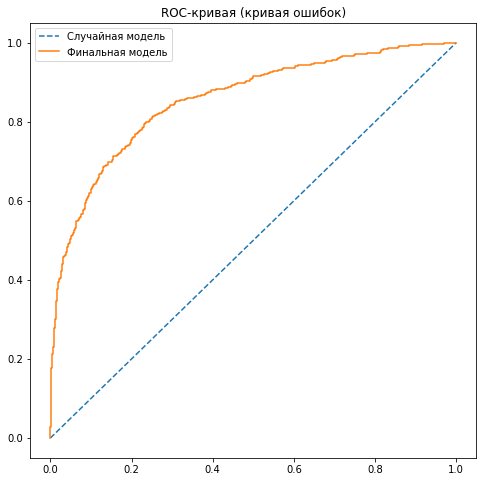

In [48]:
probabilities_test = model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)
plt.figure(figsize=(8, 8))
plt.title('ROC-кривая (кривая ошибок)')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.legend(('Случайная модель', 'Финальная модель'))
plt.show()

AUC-ROC метрика финальной модели — 85% — сильно выше показателя случайной модели.

### Вывод

Значение метрики f1 больше заявленного в задании минимума, так же значение auc_roc не на много отличается от значения при проверке на валидационной выборке (0.8535 на валидационной выборке).

В ходе проекта была создана модель машинного обучения, дающая достаточно высокий уровень f1.

Для этого первоначальные данные были обработаны: пропуски в столбце tenure заполнены средным значением, выполнена проверка на дубликаты, проверено отсутствие дубликатов в столбце с индивидуальным номером. Были обозначены объекты, признаки и целевой признак. Категориальные признаки Geography и Gender были преобразованы в численные С помощью техники OHE; 

Затем были удалены столбцы, не нужные для создания модели, и весь датасет разделен на три выборки: обучающую (60%), тестовую (20%) и валидационную (20%).

Сначала было проведено обучение моделей без учета дисбаланса классов (было выявлено, что отношение не ушедших клиентов к ушедшим составляет 4 к 1). Были обучены модели решающее дерево, случайный лес, логистическая регрессия. В моделях были использованы различные значения гиперпараметров, чтобы найти наибольшее значение f1 и auc-roc.

Затем провели обучение моделей уже с учетом дисбаланса классов, используя следующие методы: атрибут class_weight, увеличение и уменьшение выборки.

В ходе борьбы с дисбалансом максимального значения f1 удалось добиться при использовании атрибута class_weight и модели случайного леса с количеством деревьев 100 и максимальной глубиной 10. Увеличение и уменьшение выборки не дали никаких результатов. Данная модель с указанными гиперпараметрами была использована для проверки на тестовой выборке, где значения f1=0.6218 и auc_roc=0,8552, что соответствует поставленному в задаче условию.

Было выполнено сравнение финальной модели с константной моделью, и финальная модель показала себя лучше: точность 0,84 (у константной - 0,209), auc-roc 0.8552 (у константной - 0,5). С помощью метрики recall было установлено, что финальная модель верно определит массив ушедших клиентов с вероятностью 0.61. У случайной модели f1=0.3457, что намного меньше, чем у финальной модели.


Сравнение финальной модели с константной моделью.

Сравним модели по метрикам. В константной модели предскажем везде 1.

In [54]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_dummy = f1_score(target_test, dummy_model.predict(features_test))
print("F1:", f1_dummy)

F1: 0.3457402812241522


In [50]:

print('Точность константной модели', accuracy_score(target_test, dummy_model.predict(features_test)))

print('Точность финальной модели', accuracy_score(target_test, predicted_test))

print('AUC-ROC константной модели', roc_auc_score(target_test, dummy_model.predict(features_test)))

print('AUC-ROC финальной модели', roc_auc_score(target_test, probabilities_one_test))


Точность константной модели 0.209
Точность финальной модели 0.8425
AUC-ROC константной модели 0.5
AUC-ROC финальной модели 0.8551935954125055


Также посмотрим, какую долю клиентов на отток модель верно детектирует. Воспользуемся метрикой recall.

In [51]:
print('Модель верно определит массив ушедших клиентов с вероятностью', recall_score(target_test, predicted_test))

Модель верно определит массив ушедших клиентов с вероятностью 0.6196172248803827


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*